<a href="https://colab.research.google.com/github/alik604/Notebooks/blob/master/Data%20Science-Datasets/MNIST/MNIST_with_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST with denoising 

References: 
* the whole damn internet...
* reduce noise: https://blog.keras.io/building-autoencoders-in-keras.html
* reduce noise: https://medium.com/activating-robotic-minds/how-to-reduce-image-noises-by-autoencoder-65d5e6de543
* CNN: https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
* predict without ANNs: https://github.com/edyoda/data-science-complete-tutorial/blob/master/Case%20Study%20Handwriting%20Detection.ipynb


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import keras
from keras.datasets import *
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,Input
from keras.layers import Conv2D, MaxPooling2D,UpSampling2D

from keras import backend as K
import tensorflow as tf

from sklearn.model_selection import train_test_split

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# the data, split between train and test sets
(train_images, train_lables), (test_images, test_lables) = mnist.load_data()
train_images = train_images /255.0
train_lables = train_lables / 255.0


# classnames = ["top", "trouser", "pullover", "dress", "coat",
# "sandal", "shirt", "sneaker", "bag", "ankle boot"]
classnames = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

Using TensorFlow backend.


# Clean Data 

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() # when you have to much ram and are too lazy for references...

def preprocess(x):
    x = x.astype('float32') / 255.
    return x.reshape(-1, np.prod(x.shape[1:])) # flatten
X_train = preprocess(X_train)
X_test  = preprocess(X_test)

X_train, X_valid = train_test_split(X_train, test_size=500)

In [3]:
def make_convolutional_autoencoder():
    # encoding
    inputs = keras.Input(shape=(28, 28, 1))
    x = Conv2D(16, 3, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(padding='same')(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    x = MaxPooling2D(padding='same')(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    encoded = MaxPooling2D(padding='same')(x)    
    
    # decoding
    x = Conv2D( 8, 3, activation='relu', padding='same')(encoded)
    x = UpSampling2D()(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    x = UpSampling2D()(x)
    x = Conv2D(16, 3, activation='relu')(x) # <= padding='valid'!
    x = UpSampling2D()(x)
    decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)
    
    # autoencoder
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', 
                        loss='binary_crossentropy')
    return autoencoder
# create a convolutional autoencoder
autoencoder = make_convolutional_autoencoder()








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
# reshape the flattened images to 28x28 with 1 channel
X_train = X_train.reshape(-1, 28, 28, 1)
X_valid = X_valid.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)
autoencoder.fit(X_train, X_train, 
                epochs=20, 
                batch_size=128, 
                validation_data=(X_valid, X_valid))




Train on 59500 samples, validate on 500 samples
Epoch 1/20





59500/59500 [==============================] - 9s 148us/step - loss: 0.2226 - val_loss: 0.1513
Epoch 2/20
59500/59500 [==============================] - 6s 93us/step - loss: 0.1371 - val_loss: 0.1287
Epoch 3/20
59500/59500 [==============================] - 6s 92us/step - loss: 0.1224 - val_loss: 0.1183
Epoch 4/20
59500/59500 [==============================] - 6s 94us/step - loss: 0.1158 - val_loss: 0.1141
Epoch 5/20
59500/59500 [==============================] - 6s 94us/step - loss: 0.1119 - val_loss: 0.1100
Epoch 6/20
59500/59500 [==============================] - 6s 93us/step - loss: 0.1092 - val_loss: 0.1075
Epoch 7/20
59500/59500 [==============================] - 6s 94us/step - loss: 0.1073 - val_loss: 0.1059
Epoch 8/20
59500/59500 [==============================] - 6s 93us/step - loss: 0.1058 - val_loss: 0.1049
Epoch 9/20
59500/59500 [==============================] - 6s 94us/step - loss: 0.1046 - val_loss: 0.103

Text(0.5, 1.0, 'original')

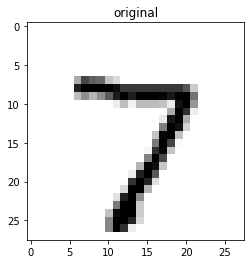

Text(0.5, 1.0, 'decoded')

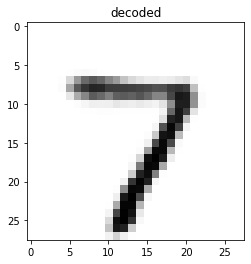

In [5]:
test_base = np.array([X_test[0],X_test[1]])
X_test_decoded = autoencoder.predict(test_base) 

test_input  = test_base.reshape(-1, 28, 28)
test_decoded  = X_test_decoded.reshape(-1, 28, 28)

# # utility to display a row of digits with their predictions
# def display_digits(digits, predictions, labels, title, n):
#   fig = plt.figure(figsize=(13,3))
#   digits = np.reshape(digits, [n, 28, 28])
#   digits = np.swapaxes(digits, 0, 1)
#   digits = np.reshape(digits, [28, 28*n])
#   plt.yticks([])
#   plt.xticks([28*x+14 for x in range(n)], predictions)
#   plt.grid(b=None)
#   for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
#     if predictions[i] != labels[i]: t.set_color('red') # bad predictions in red
#   plt.imshow(digits)
#   plt.grid(None)
#   plt.title(title)
#   display.display(fig)

# display_digits(test,None,None,"",len(X_test))


plt.grid(False)
plt.title("original")
plt.imshow(test_input[0],cmap=plt.cm.binary)
plt.show()

plt.title("decoded")
plt.imshow(test_decoded[0],cmap=plt.cm.binary)
plt.show()



## With added noise

In [0]:
def add_noise(x, noise_factor=0.2):
    x = x + np.random.randn(*x.shape) * noise_factor
    x = x.clip(0., 1.)
    return x
    
X_train_noisy = add_noise(X_train)
X_valid_noisy = add_noise(X_valid)
X_test_noisy  = add_noise(X_test)

In [7]:
autoencoder = make_convolutional_autoencoder()
autoencoder.fit(X_train_noisy, X_train, 
                epochs=10, 
                batch_size=128, 
                validation_data=(X_valid_noisy, X_valid))

Train on 59500 samples, validate on 500 samples
Epoch 1/10
59500/59500 [==============================] - 7s 126us/step - loss: 0.2672 - val_loss: 0.1743
Epoch 2/10
59500/59500 [==============================] - 7s 115us/step - loss: 0.1582 - val_loss: 0.1454
Epoch 3/10
59500/59500 [==============================] - 7s 115us/step - loss: 0.1391 - val_loss: 0.1346
Epoch 4/10
59500/59500 [==============================] - 7s 115us/step - loss: 0.1307 - val_loss: 0.1283
Epoch 5/10
59500/59500 [==============================] - 7s 114us/step - loss: 0.1258 - val_loss: 0.1236
Epoch 6/10
59500/59500 [==============================] - 7s 112us/step - loss: 0.1224 - val_loss: 0.1215
Epoch 7/10
59500/59500 [==============================] - 7s 112us/step - loss: 0.1198 - val_loss: 0.1184
Epoch 8/10
59500/59500 [==============================] - 7s 112us/step - loss: 0.1177 - val_loss: 0.1167
Epoch 9/10
59500/59500 [==============================] - 7s 113us/step - loss: 0.1158 - val_loss: 0.114

In [0]:
X_test_decoded = autoencoder.predict(X_test_noisy)

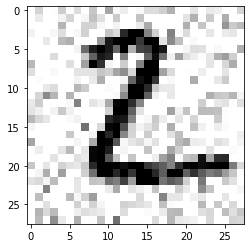

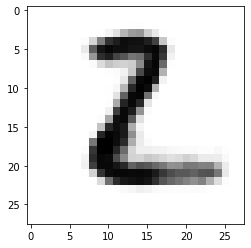

In [9]:
test  = X_test_decoded.reshape(-1, 28, 28)
test_n  = X_test_noisy.reshape(-1, 28, 28)


plt.imshow(test_n[1],cmap=plt.cm.binary)
plt.show()

plt.imshow(test[1],cmap=plt.cm.binary)
plt.show()

# Prediction 

In [0]:
#(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() # when you have to much ram and are too lazy for references...

# def preprocess(x):
#     x = x.astype('float32') / 255.
#     return x.reshape(-1, np.prod(x.shape[1:])) # flatten
# X_train = preprocess(X_train)
# X_test  = preprocess(X_test)


# X_test  = X_test.reshape(-1, 28, 28, 1)

X_train_decoded = autoencoder.predict(X_train)
X_test_decoded = autoencoder.predict(X_test) 
X_valid_decoded = autoencoder.predict(X_valid)

In [11]:
# model = keras.Sequential([
#   keras.layers.Flatten(input_shape=(28,28)),
#   keras.layers.Dense(128,activation="relu"), 
#   keras.layers.Dense(256,activation="relu"),
#   keras.layers.Dense(10,activation="softmax") # adds upto 1             
# ])
# model.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"])#sparse_categorical_crossentropy
# model.fit(train_images,train_lables,epochs=5)

input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(32, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])#sparse_categorical_crossentropy
model.fit(X_test_decoded,y_test,epochs=5)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
10000/10000 [==============================] - 3s 272us/step - loss: 0.6773 - acc: 0.7828
Epoch 2/5
10000/10000 [==============================] - 2s 207us/step - loss: 0.3149 - acc: 0.9011
Epoch 3/5
10000/10000 [==============================] - 2s 213us/step - loss: 0.2411 - acc: 0.9225
Epoch 4/5
10000/10000 [==============================] - 2s 221us/step - loss: 0.1979 - acc: 0.9313
Epoch 5/5
10000/10000 [==============================] - 2s 209us/step - loss: 0.1757 - acc: 0.9421


In [12]:
test_loss,test_acc = model.evaluate(X_test_noisy,y_test[:len(X_test_noisy)])
print("tested Acc: ", test_acc) # 0.9803; two conv2d = .9891; two conv2d  + Dense 128 + drop 0.2 + Dense 32 = .9896

10000/10000 [==============================] - 1s 97us/step
tested Acc:  0.9621


Text(0.5, 0, 'Actual: 7')

Text(0.5, 1.0, 'Prediction: 2')

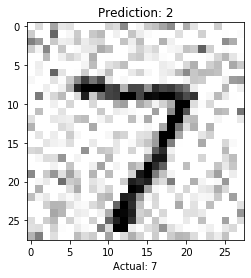

Text(0.5, 0, 'Actual: 2')

Text(0.5, 1.0, 'Prediction: 2')

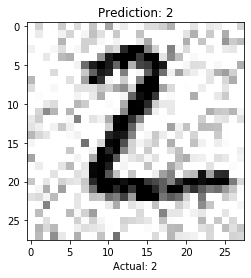

In [41]:
prediction = model.predict(X_test_noisy)
#prediction
for i in range(2):
  plt.grid(False)
  plt.imshow(X_test_noisy[i].reshape(28,28),cmap=plt.cm.binary)
  plt.xlabel("Actual: " + classnames[y_test[i]])
  plt.title("Prediction: " + classnames[np.argmax(prediction[i])])
  plt.show()

In [42]:
test_loss,test_acc = model.evaluate(X_test_decoded,y_test[:len(X_test_decoded)])
print("tested Acc: ", test_acc) # 0.9803; two conv2d = .9891; two conv2d  + Dense 128 + drop 0.2 + Dense 32 = .9896

10000/10000 [==============================] - 1s 96us/step
tested Acc:  0.0768


In [0]:
test_loss,test_acc = model.evaluate(X_test,y_test[:len(X_test_decoded)])
print("tested Acc: ", test_acc) # 0.9803; two conv2d = .9891; two conv2d  + Dense 128 + drop 0.2 + Dense 32 = .9896

In [14]:
#@this has hidden stuff inside 
print("this is hidden")

this is hidden


In [32]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() # when you have to much ram and are too lazy for references...

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255


# model = keras.Sequential([
#   keras.layers.Flatten(input_shape=(28,28)),
#   keras.layers.Dense(128,activation="relu"), 
#   keras.layers.Dense(256,activation="relu"),
#   keras.layers.Dense(10,activation="softmax") # adds upto 1             
# ])
# model.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"])#sparse_categorical_crossentropy
# model.fit(train_images,train_lables,epochs=5)

input_shape = (28, 28, 1)

model_control = Sequential()
model_control.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model_control.add(MaxPooling2D(pool_size=(2, 2)))
model_control.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model_control.add(MaxPooling2D(pool_size=(2, 2)))
model_control.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model_control.add(Dense(128, activation=tf.nn.relu))
model_control.add(Dropout(0.2))
model_control.add(Dense(32, activation=tf.nn.relu))
model_control.add(Dense(10,activation=tf.nn.softmax))

model_control.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])#sparse_categorical_crossentropy
model_control.fit(x_train,y_train,epochs=5)


Epoch 1/5
60000/60000 [==============================] - 14s 241us/step - loss: 2.3023 - acc: 0.1102
Epoch 2/5
60000/60000 [==============================] - 14s 231us/step - loss: 2.3015 - acc: 0.1122
Epoch 3/5
60000/60000 [==============================] - 14s 242us/step - loss: 2.3015 - acc: 0.1118
Epoch 4/5
60000/60000 [==============================] - 14s 225us/step - loss: 2.3016 - acc: 0.1123
Epoch 5/5
60000/60000 [==============================] - 14s 227us/step - loss: 2.3015 - acc: 0.1122


In [33]:
test_loss,test_acc = model_control.evaluate(x_test,y_test)
print("tested Acc: ", test_acc) # 0.9803; two conv2d = .9891; two conv2d  + Dense 128 + drop 0.2 + Dense 32 = .9896

10000/10000 [==============================] - 1s 115us/step
tested Acc:  0.1135


Text(0.5, 0, 'Actual: 7')

Text(0.5, 1.0, 'Prediction: 1')

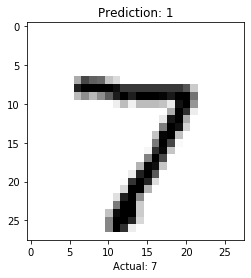

Text(0.5, 0, 'Actual: 2')

Text(0.5, 1.0, 'Prediction: 1')

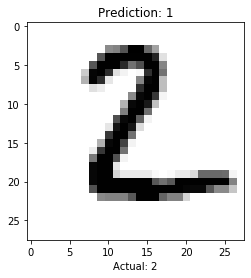

Text(0.5, 0, 'Actual: 1')

Text(0.5, 1.0, 'Prediction: 1')

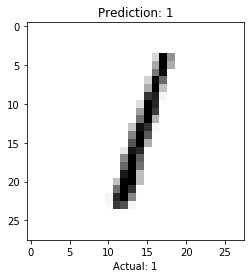

Text(0.5, 0, 'Actual: 0')

Text(0.5, 1.0, 'Prediction: 1')

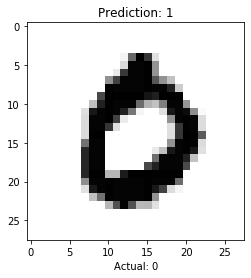

Text(0.5, 0, 'Actual: 4')

Text(0.5, 1.0, 'Prediction: 1')

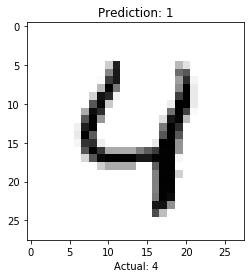

In [34]:
prediction = model_control.predict(x_train)
#prediction
for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i],cmap=plt.cm.binary)
  plt.xlabel("Actual: " + classnames[y_test[i]])
  plt.title("Prediction: " + classnames[np.argmax(prediction[i])])
  plt.show()